In [1]:
import os
import numpy as np
import pandas as pd
import datetime
files = os.listdir('raw_data/')

# group raw data by elevation listed in filenames

tline_top_files = [file for file in files if '6990' in file]
tline_lodge_files = [file for file in files if '5880' in file]
meadows_files = [file for file in files if '5380' in file]
meadows_top_files = [file for file in files if '7300' in file]

print(tline_top_files)
print()
print(tline_lodge_files)
print()
print(meadows_files)
print()
print(meadows_top_files)

['Timberline-MagicMile_6990_feet_2014.csv', 'Timberline-MagicMile_6990_feet_2017.csv', 'Timberline-MagicMile_6990_feet_2016.csv', 'Timberline-MagicMile_6990_feet_2015.csv']

['TimberlineLodge_5880_feet_2017.csv', 'TimberlineLodge_5880_feet_2016.csv', 'TimberlineLodge_5880_feet_2014.csv', 'TimberlineLodge_5880_feet_2015.csv']

['MtHoodMeadowsBase_5380_feet_2015.csv', 'MtHoodMeadowsBase_5380_feet_2017.csv', 'MtHoodMeadowsBase_5380_feet_2014.csv', 'MtHoodMeadowsBase_5380_feet_2016.csv']

['MtHoodMeadows-CascadeExpress_7300_feet_2014.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2015.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2016.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2017.csv']


In [2]:
def assemble(filelist, label):
    frame = pd.DataFrame()
    num_rows = 0
    for file in filelist:
        tmp = pd.read_csv('raw_data/' + file)
        num_rows += len(tmp)
        tmp.index = tmp['Date/Time (PST)'].map(lambda x: pd.to_datetime(x, utc='America/Los_Angeles'))
        # tmp.index = tmp.index.tz_convert('America/Los_Angeles')
        del(tmp['Date/Time (PST)'])
        tmp.columns = [col.replace(' (")', '').replace(' (deg F)', '').replace(' (mph)', '').replace(' (%)', '').replace(' ', '_') + label for col in tmp.columns]
        frame = pd.concat([frame, tmp])
        print(num_rows, 'added:', len(frame))
    return frame

In [3]:
# tline_top = assemble(tline_top_files, '_tt')
tline_lodge = assemble(tline_lodge_files, '_tl')
meadows = assemble(meadows_files, '_m')

# data other than from Tline is messy
weather = pd.concat([meadows, tline_lodge], axis=1)

8179 added: 8179
16964 added: 16964
18944 added: 18944
27634 added: 27634
8678 added: 8678
16863 added: 16863
19254 added: 19254
28042 added: 28042


In [4]:
weather.sort_index(inplace=True)
weather.head(3)

,Battery_Voltage_(v)_m,Temperature_m,Relative_Humidity_m,Precipitation_m,24_hour_snowfall_m,Snow_Depth_m,Barometric_Pressure_(mb)_m,Battery_Voltage_(v)_tl,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,Precipitation_tl,24_hour_snowfall_tl,Snow_Depth_tl
Date/Time (PST),,,,,,,,,,,,,,,,,
2014-09-23 09:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,1015.629,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,30.880,4.007
2014-09-23 10:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,NaN,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,4.007,30.880
2014-09-23 11:00:00+00:00,13.18,55.82,55.47,0.0,53.83,15.43,NaN,11.44,53.69,60.46,-0.034,2.113,8.540,253.8,0.0,3.077,31.350


In [5]:
diff = weather.index[1:] - weather.index[:-1]

In [6]:
print(len(weather))
print(diff.max())
print(diff.argmax())  # longest gap without weather data
weather.iloc[8173:8180]

28094
2 days 00:00:00
8174


,Battery_Voltage_(v)_m,Temperature_m,Relative_Humidity_m,Precipitation_m,24_hour_snowfall_m,Snow_Depth_m,Barometric_Pressure_(mb)_m,Battery_Voltage_(v)_tl,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,Precipitation_tl,24_hour_snowfall_tl,Snow_Depth_tl
Date/Time (PST),,,,,,,,,,,,,,,,,
2015-08-29 22:00:00+00:00,13.49,45.61,93.20,0.05,54.57,4.067,1012.592,13.62,43.58,100.0,1.649,6.415,15.04,294.0,0.17,30.74,0.587
2015-08-29 23:00:00+00:00,13.49,46.22,92.90,0.00,55.30,4.667,1012.456,13.61,43.46,100.0,4.172,8.730,18.88,287.5,0.01,30.74,2.437
2015-08-31 23:00:00+00:00,13.43,50.23,37.66,0.00,66.56,7.448,1015.127,13.61,41.76,96.4,7.770,13.600,20.76,314.4,0.00,30.94,5.087
2015-09-01 00:00:00+00:00,13.44,50.11,35.63,0.00,63.50,12.510,1014.856,13.61,41.16,96.4,5.518,12.370,21.23,312.3,0.00,30.87,5.087
2015-09-01 01:00:00+00:00,13.46,47.31,56.90,0.00,59.56,11.310,1014.871,13.61,40.92,98.5,6.931,12.160,21.97,306.8,0.00,30.80,5.484
2015-09-01 02:00:00+00:00,13.47,51.82,26.83,0.00,56.03,14.360,1014.735,13.61,40.31,95.6,5.451,11.710,22.41,308.6,0.00,30.87,5.617
2015-09-01 03:00:00+00:00,13.44,52.67,21.41,0.00,55.90,12.850,1014.449,13.60,39.70,96.0,6.157,11.600,18.20,309.3,0.00,30.87,5.617


In [7]:
rng = pd.date_range(weather.index[0], periods=28150, freq='H')
rng

DatetimeIndex(['2014-09-23 09:00:00+00:00', '2014-09-23 10:00:00+00:00',
               '2014-09-23 11:00:00+00:00', '2014-09-23 12:00:00+00:00',
               '2014-09-23 13:00:00+00:00', '2014-09-23 14:00:00+00:00',
               '2014-09-23 15:00:00+00:00', '2014-09-23 16:00:00+00:00',
               '2014-09-23 17:00:00+00:00', '2014-09-23 18:00:00+00:00',
               ...
               '2017-12-08 21:00:00+00:00', '2017-12-08 22:00:00+00:00',
               '2017-12-08 23:00:00+00:00', '2017-12-09 00:00:00+00:00',
               '2017-12-09 01:00:00+00:00', '2017-12-09 02:00:00+00:00',
               '2017-12-09 03:00:00+00:00', '2017-12-09 04:00:00+00:00',
               '2017-12-09 05:00:00+00:00', '2017-12-09 06:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=28150, freq='H')

In [8]:
df = weather.reindex(rng, method='ffill')
df.head()

,Battery_Voltage_(v)_m,Temperature_m,Relative_Humidity_m,Precipitation_m,24_hour_snowfall_m,Snow_Depth_m,Barometric_Pressure_(mb)_m,Battery_Voltage_(v)_tl,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,Precipitation_tl,24_hour_snowfall_tl,Snow_Depth_tl
2014-09-23 09:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,1015.629,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,30.880,4.007
2014-09-23 10:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,NaN,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,4.007,30.880
2014-09-23 11:00:00+00:00,13.18,55.82,55.47,0.0,53.83,15.43,NaN,11.44,53.69,60.46,-0.034,2.113,8.540,253.8,0.0,3.077,31.350
2014-09-23 12:00:00+00:00,13.16,57.04,59.40,0.0,54.43,13.56,NaN,11.70,54.79,64.29,-0.034,3.683,12.170,236.7,0.0,3.077,31.410
2014-09-23 13:00:00+00:00,13.18,55.58,64.75,0.0,55.76,13.49,NaN,11.17,53.57,70.40,0.000,5.422,16.640,252.7,0.0,-6999.000,30.820


In [9]:
# start picking cleanest rough equivalent data; drop unnecessary stuff also

for col in ['Battery_Voltage_(v)_tl',
            'Battery_Voltage_(v)_m',]:
    df.drop(col, axis=1, inplace=True)

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

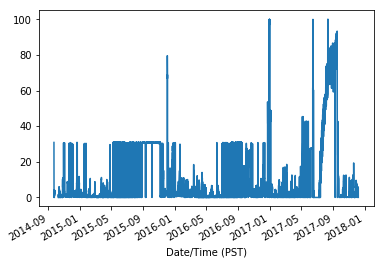

In [11]:
weather['24_hour_snowfall_tl'].clip(0, 100).plot()   # data is pretty messed up...

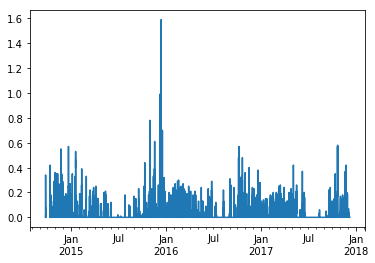

In [12]:
df['Precipitation_tl'].plot()

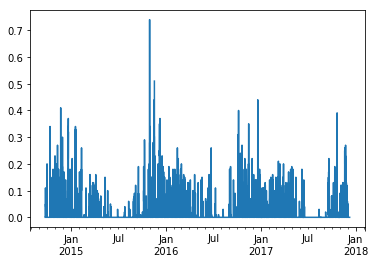

In [13]:
df['Precipitation_m'].plot()

In [14]:
df['precip'] = np.mean([df.Precipitation_m.values, df.Precipitation_tl.values], axis=0)

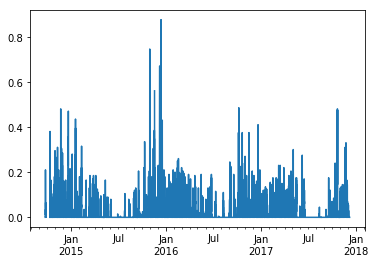

In [15]:
df.precip.plot()

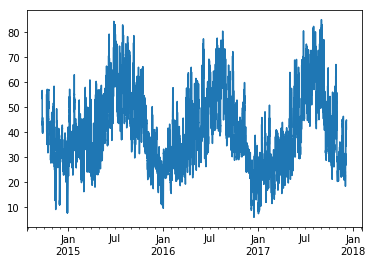

In [16]:
df.Temperature_tl.plot()   # woo

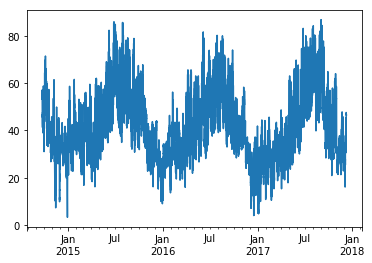

In [17]:
df.Temperature_m.plot()   # woo

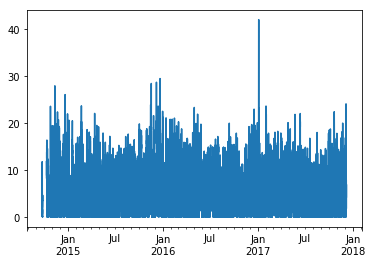

In [18]:
df.Wind_Speed_Average_tl.plot()

In [19]:
df.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Precipitation_m',
       '24_hour_snowfall_m', 'Snow_Depth_m', 'Barometric_Pressure_(mb)_m',
       'Temperature_tl', 'Relative_Humidity_tl', 'Wind_Speed_Minimum_tl',
       'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl',
       'Wind_Direction_(deg.)_tl', 'Precipitation_tl', '24_hour_snowfall_tl',
       'Snow_Depth_tl', 'precip'],
      dtype='object')

In [20]:
df.drop(['Precipitation_m', 'Precipitation_tl', '24_hour_snowfall_tl', '24_hour_snowfall_m'], axis=1, inplace=True)

In [21]:
df.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Snow_Depth_m',
       'Barometric_Pressure_(mb)_m', 'Temperature_tl', 'Relative_Humidity_tl',
       'Wind_Speed_Minimum_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'Snow_Depth_tl',
       'precip'],
      dtype='object')

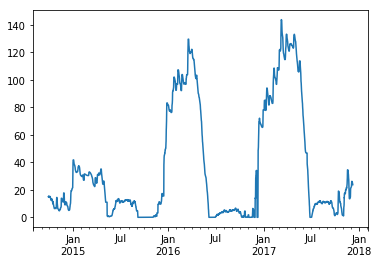

In [22]:
df.Snow_Depth_m.clip(0).rolling(96).median().fillna(method='ffill').plot()

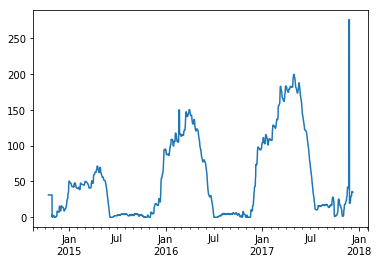

In [23]:
df.Snow_Depth_tl.clip(0).rolling(96).median().fillna(method='ffill').plot()

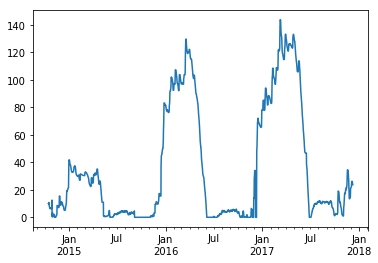

In [24]:
df['depth'] = np.minimum(df.Snow_Depth_tl.clip(0).rolling(96).median().fillna(method='ffill'),
                         df.Snow_Depth_m.clip(0).rolling(96).median().fillna(method='ffill'))
df.depth.plot()

In [25]:
df.drop(['Snow_Depth_tl', 'Snow_Depth_m'], axis=1, inplace=True)
df.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Barometric_Pressure_(mb)_m',
       'Temperature_tl', 'Relative_Humidity_tl', 'Wind_Speed_Minimum_tl',
       'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl',
       'Wind_Direction_(deg.)_tl', 'precip', 'depth'],
      dtype='object')

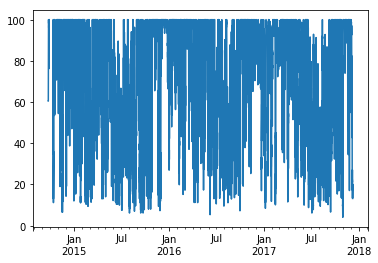

In [26]:
df.Relative_Humidity_tl.plot()

In [27]:
df['pressure'] = df['Barometric_Pressure_(mb)_m'].clip(990)
df.drop('Barometric_Pressure_(mb)_m', axis=1, inplace=True)
df.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Minimum_tl',
       'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl',
       'Wind_Direction_(deg.)_tl', 'precip', 'depth', 'pressure'],
      dtype='object')

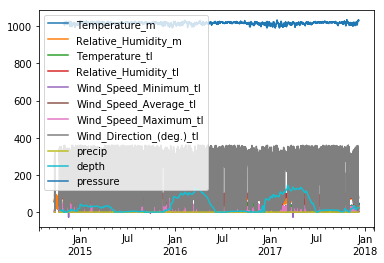

In [28]:
df.plot()

In [29]:
# fill all values with something reasonable...
df.fillna(method='backfill', inplace=True)
df.fillna(method='ffill', inplace=True)

In [30]:
df.describe()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure
count,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000,28150.000000
mean,41.357159,69.047897,40.471975,71.811680,1.872076,5.996870,13.226087,232.415416,0.014691,35.256045,1016.179698
std,14.172212,24.561728,14.490341,28.447059,2.628059,4.855112,8.168596,106.050964,0.041274,42.242857,6.090327
min,3.229000,4.673000,5.743000,4.038000,-27.940000,-0.036000,0.000000,0.005000,0.000000,0.000000,990.000000
25%,30.882500,48.290000,29.210000,46.775000,-0.067000,1.504000,7.170000,106.025000,0.000000,2.895000,1013.155000
50%,39.390000,76.070000,37.910000,82.600000,0.000000,5.584500,12.960000,286.800000,0.000000,11.255000,1017.269000
75%,50.840000,91.900000,51.070000,99.400000,3.634000,9.320000,18.410000,310.500000,0.005000,69.320000,1020.180000
max,86.800000,100.000000,85.000000,100.000000,17.790000,41.900000,72.800000,360.000000,0.875000,143.700000,1034.949000


In [31]:
df.to_csv('clean_weather_data.csv')